# Imports

In [1]:
import os
import ipdb
import argparse
import numpy as np
import pandas as pd
import numpy.random as random
from sklearn.inspection import permutation_importance
import networkx as nx
from progressbar import ProgressBar
import matplotlib.pyplot as plt
import gzip
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json
from utilitiesMe import flatten_dict
pd.options.display.max_columns = 9999999

## G5

In [2]:
data = []
with gzip.open('movielens_5_injected_G5.json.gz', 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [3]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [4]:
## Convert flattened json to dataframe
dfG5 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG5 = dfG5.add_prefix('G5_')

In [5]:
dfG5

,G5_t,G5_u,G5_v,G5_is_fraud,G5_history_type,G5_history_size,G5_bip,G5_cost,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight
0,874724710,bottom_255,top_259,0,G,5,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,874724727,bottom_286,top_259,0,G,5,True,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,874724754,bottom_298,top_259,0,G,5,True,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,874724781,bottom_185,top_259,0,G,5,True,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,874724843,bottom_173,top_259,0,G,5,True,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,893286638,bottom_313,top_729,0,G,5,True,0.0,6.0,6.0,0.0,1.0,1.0,1.0,6.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,6.0,6.0,6.0,1.0,6.0,6.0,1.0,0.0,0.0,1.0,6.0,6.0,1.0,0.0,0.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,1.0,6.0,0.0
104996,893286638,bottom_328,top_729,0,G,5,True,0.0,7.0,7.0,0.0,1.0,1.0,1.0,7.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,7.0,7.0,0.0,0.0,7.0,7.0,7.0,1.0,7.0,7.0,1.0,0.0,0.0,1.0,7.0,7.0,1.0,0.0,0.0,7.0,7.0,7.0,0.0,1.0,1.0,1.0,1.0,7.0,0.0
104997,893286638,bottom_333,top_729,0,G,5,True,0.0,8.0,8.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,8.0,8.0,8.0,0.0,0.0,8.0,8.0,8.0,1.0,8.0,8.0,1.0,0.0,0.0,1.0,8.0,8.0,1.0,0.0,0.0,8.0,8.0,8.0,0.0,1.0,1.0,1.0,1.0,8.0,0.0
104998,893286638,bottom_689,top_729,0,G,5,True,0.0,9.0,9.0,0.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,9.0,9.0,9.0,0.0,0.0,9.0,9.0,9.0,1.0,9.0,9.0,1.0,0.0,0.0,1.0,9.0,9.0,1.0,0.0,0.0,9.0,9.0,9.0,0.0,1.0,1.0,1.0,1.0,9.0,0.0


## G60

In [6]:
data = []
with gzip.open('movielens_5_injected_G60.json.gz', 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [7]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [8]:
## Convert flattened json to dataframe
dfG60 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG60 = dfG60.add_prefix('G60_')

In [9]:
dfG60

,G60_t,G60_u,G60_v,G60_is_fraud,G60_history_type,G60_history_size,G60_bip,G60_cost,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight
0,874724710,bottom_255,top_259,0,G,60,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,874724727,bottom_286,top_259,0,G,60,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874724754,bottom_298,top_259,0,G,60,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,874724781,bottom_185,top_259,0,G,60,True,0.0,3.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0
4,874724843,bottom_173,top_259,0,G,60,True,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,893286638,bottom_313,top_729,0,G,60,True,0.0,8.0,8.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,6.0,2.0,0.0,1.0,2.0,6.0,2.0,1.0,6.0,8.0,1.0,0.0,0.0,1.0,6.0,8.0,1.0,0.0,0.0,8.0,8.0,8.0,0.0,1.0,1.0,1.0,1.0,8.0,0.0
104996,893286638,bottom_328,top_729,0,G,60,True,0.0,9.0,9.0,0.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,0.0,1.0,2.0,7.0,2.0,1.0,7.0,9.0,1.0,0.0,0.0,1.0,7.0,9.0,1.0,0.0,0.0,9.0,9.0,9.0,0.0,1.0,1.0,1.0,1.0,9.0,0.0
104997,893286638,bottom_333,top_729,0,G,60,True,0.0,10.0,10.0,0.0,1.0,1.0,1.0,10.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,8.0,2.0,0.0,1.0,2.0,8.0,2.0,1.0,8.0,10.0,1.0,0.0,0.0,1.0,8.0,10.0,1.0,0.0,0.0,10.0,10.0,10.0,0.0,1.0,1.0,1.0,1.0,10.0,0.0
104998,893286638,bottom_689,top_729,0,G,60,True,0.0,11.0,11.0,0.0,1.0,1.0,1.0,11.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,9.0,2.0,0.0,1.0,2.0,9.0,2.0,1.0,9.0,11.0,1.0,0.0,0.0,1.0,9.0,11.0,1.0,0.0,0.0,11.0,11.0,11.0,0.0,1.0,1.0,1.0,1.0,11.0,0.0


## G3600

In [10]:
data = []
with gzip.open('movielens_5_injected_G3600.json.gz', 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [11]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [12]:
## Convert flattened json to dataframe
dfG3600 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG3600 = dfG3600.add_prefix('G3600_')

In [13]:
dfG3600

,G3600_t,G3600_u,G3600_v,G3600_is_fraud,G3600_history_type,G3600_history_size,G3600_bip,G3600_cost,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight
0,874724710,bottom_255,top_259,0,G,3600,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,874724727,bottom_286,top_259,0,G,3600,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874724754,bottom_298,top_259,0,G,3600,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,874724781,bottom_185,top_259,0,G,3600,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,874724843,bottom_173,top_259,0,G,3600,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,893286638,bottom_313,top_729,0,G,3600,True,0.0,80.0,69.0,11.0,1.0,2.0,1.0,69.0,11.0,1.0,2.0,1.0,7.0,5.0,0.0,1.0,69.0,1.0,5.0,0.0,1.0,69.0,1.0,1.0,17.0,69.0,1.0,11.0,1.0,1.0,17.0,69.0,1.0,11.0,1.0,91.0,91.0,91.0,0.0,1.0,1.0,1.0,1.0,91.0,0.0
104996,893286638,bottom_328,top_729,0,G,3600,True,0.0,80.0,68.0,12.0,1.0,2.0,1.0,68.0,12.0,1.0,2.0,1.0,7.0,5.0,0.0,1.0,69.0,1.0,5.0,0.0,1.0,69.0,1.0,2.0,18.0,12.0,1.0,0.0,1.0,2.0,18.0,12.0,1.0,0.0,1.0,92.0,92.0,92.0,0.0,1.0,1.0,1.0,1.0,92.0,0.0
104997,893286638,bottom_333,top_729,0,G,3600,True,0.0,81.0,69.0,12.0,1.0,2.0,1.0,69.0,12.0,1.0,2.0,1.0,7.0,5.0,0.0,1.0,69.0,1.0,5.0,0.0,1.0,69.0,1.0,1.0,19.0,69.0,1.0,12.0,1.0,1.0,19.0,69.0,1.0,12.0,1.0,93.0,93.0,93.0,0.0,1.0,1.0,1.0,1.0,93.0,0.0
104998,893286638,bottom_689,top_729,0,G,3600,True,0.0,82.0,70.0,12.0,1.0,2.0,1.0,70.0,12.0,1.0,2.0,1.0,7.0,5.0,0.0,1.0,69.0,1.0,5.0,0.0,1.0,69.0,1.0,1.0,20.0,70.0,1.0,12.0,1.0,1.0,20.0,70.0,1.0,12.0,1.0,94.0,94.0,94.0,0.0,1.0,1.0,1.0,1.0,94.0,0.0


## G86400

In [14]:
data = []
with gzip.open('movielens_5_injected_G86400.json.gz', 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [15]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [16]:
## Convert flattened json to dataframe
dfG86400 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG86400 = dfG86400.add_prefix('G86400_')

In [17]:
dfG86400

,G86400_t,G86400_u,G86400_v,G86400_is_fraud,G86400_history_type,G86400_history_size,G86400_bip,G86400_cost,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degree,G86400_v_greater_degree,G86400_u_weighted_degree,G86400_v_weighted_degree,G86400_u_same_weighted_degree,G86400_v_same_weighted_degree,G86400_u_greater_weighted_degree,G86400_v_greater_weighted_degree,G86400_number_of_links,G86400_total_weight,G86400_link_weights_nb_one,G86400_link_weights_nb_two,G86400_link_weights_min,G86400_link_weights_max,G86400_link_weights_median,G86400_u_v_weight,G86400_u_v_same_weight,G86400_u_v_greater_weight
0,874724710,bottom_255,top_259,0,G,86400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,874724727,bottom_286,top_259,0,G,86400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874724754,bottom_298,top_259,0,G,86400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,874724781,bottom_185,top_259,0,G,86400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,874724843,bottom_173,top_259,0,G,86400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,893286638,bottom_313,top_729,0,G,86400,True,0.0,419.0,304.0,95.0,1.0,5.0,1.0,304.0,95.0,1.0,5.0,1.0,33.0,24.0,3.0,1.0,188.0,1.0,24.0,3.0,1.0,188.0,1.0,4.0,17.0,2.0,1.0,1.0,4.0,4.0,17.0,2.0,1.0,1.0,4.0,558.0,558.0,558.0,0.0,1.0,1.0,1.0,1.0,558.0,0.0
104996,893286638,bottom_328,top_729,0,G,86400,True,0.0,419.0,304.0,95.0,1.0,5.0,1.0,304.0,95.0,1.0,5.0,1.0,33.0,24.0,3.0,1.0,188.0,1.0,24.0,3.0,1.0,188.0,1.0,4.0,18.0,3.0,1.0,1.0,4.0,4.0,18.0,3.0,1.0,1.0,4.0,559.0,559.0,559.0,0.0,1.0,1.0,1.0,1.0,559.0,0.0
104997,893286638,bottom_333,top_729,0,G,86400,True,0.0,419.0,304.0,94.0,1.0,5.0,1.0,304.0,94.0,1.0,5.0,1.0,33.0,24.0,3.0,1.0,188.0,1.0,24.0,3.0,1.0,188.0,1.0,3.0,19.0,17.0,1.0,4.0,4.0,3.0,19.0,17.0,1.0,4.0,4.0,560.0,560.0,560.0,0.0,1.0,1.0,1.0,1.0,560.0,0.0
104998,893286638,bottom_689,top_729,0,G,86400,True,0.0,420.0,305.0,94.0,1.0,5.0,1.0,305.0,94.0,1.0,5.0,1.0,33.0,24.0,3.0,1.0,188.0,1.0,24.0,3.0,1.0,188.0,1.0,1.0,20.0,305.0,1.0,115.0,4.0,1.0,20.0,305.0,1.0,115.0,4.0,561.0,561.0,561.0,0.0,1.0,1.0,1.0,1.0,561.0,0.0


## G259200

In [18]:
data = []
with gzip.open('movielens_5_injected_G259200.json.gz', 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [19]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [20]:
## Convert flattened json to dataframe
dfG259200 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG259200 = dfG259200.add_prefix('G259200_')

In [21]:
dfG259200

,G259200_t,G259200_u,G259200_v,G259200_is_fraud,G259200_history_type,G259200_history_size,G259200_bip,G259200_cost,G259200_top_number_of_nodes,G259200_top_degrees_nb_one,G259200_top_degrees_nb_two,G259200_top_degrees_min,G259200_top_degrees_max,G259200_top_degrees_median,G259200_top_weighted_degrees_nb_one,G259200_top_weighted_degrees_nb_two,G259200_top_weighted_degrees_min,G259200_top_weighted_degrees_max,G259200_top_weighted_degrees_median,G259200_bot_number_of_nodes,G259200_bot_degrees_nb_one,G259200_bot_degrees_nb_two,G259200_bot_degrees_min,G259200_bot_degrees_max,G259200_bot_degrees_median,G259200_bot_weighted_degrees_nb_one,G259200_bot_weighted_degrees_nb_two,G259200_bot_weighted_degrees_min,G259200_bot_weighted_degrees_max,G259200_bot_weighted_degrees_median,G259200_u_degree,G259200_v_degree,G259200_u_same_degree,G259200_v_same_degree,G259200_u_greater_degree,G259200_v_greater_degree,G259200_u_weighted_degree,G259200_v_weighted_degree,G259200_u_same_weighted_degree,G259200_v_same_weighted_degree,G259200_u_greater_weighted_degree,G259200_v_greater_weighted_degree,G259200_number_of_links,G259200_total_weight,G259200_link_weights_nb_one,G259200_link_weights_nb_two,G259200_link_weights_min,G259200_link_weights_max,G259200_link_weights_median,G259200_u_v_weight,G259200_u_v_same_weight,G259200_u_v_greater_weight
0,874724710,bottom_255,top_259,0,G,259200,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,874724727,bottom_286,top_259,0,G,259200,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874724754,bottom_298,top_259,0,G,259200,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,874724781,bottom_185,top_259,0,G,259200,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,874724843,bottom_173,top_259,0,G,259200,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,893286638,bottom_313,top_729,0,G,259200,True,0.0,586.0,373.0,146.0,1.0,7.0,1.0,373.0,146.0,1.0,7.0,1.0,65.0,44.0,6.0,1.0,195.0,1.0,44.0,6.0,1.0,195.0,1.0,7.0,17.0,2.0,1.0,0.0,7.0,7.0,17.0,2.0,1.0,0.0,7.0,889.0,889.0,889.0,0.0,1.0,1.0,1.0,1.0,889.0,0.0
104996,893286638,bottom_328,top_729,0,G,259200,True,0.0,586.0,373.0,146.0,1.0,7.0,1.0,373.0,146.0,1.0,7.0,1.0,65.0,44.0,6.0,1.0,195.0,1.0,44.0,6.0,1.0,195.0,1.0,4.0,18.0,12.0,1.0,4.0,7.0,4.0,18.0,12.0,1.0,4.0,7.0,890.0,890.0,890.0,0.0,1.0,1.0,1.0,1.0,890.0,0.0
104997,893286638,bottom_333,top_729,0,G,259200,True,0.0,586.0,373.0,146.0,1.0,7.0,1.0,373.0,146.0,1.0,7.0,1.0,65.0,44.0,6.0,1.0,195.0,1.0,44.0,6.0,1.0,195.0,1.0,4.0,19.0,13.0,1.0,4.0,7.0,4.0,19.0,13.0,1.0,4.0,7.0,891.0,891.0,891.0,0.0,1.0,1.0,1.0,1.0,891.0,0.0
104998,893286638,bottom_689,top_729,0,G,259200,True,0.0,587.0,374.0,146.0,1.0,7.0,1.0,374.0,146.0,1.0,7.0,1.0,65.0,44.0,6.0,1.0,195.0,1.0,44.0,6.0,1.0,195.0,1.0,1.0,20.0,374.0,1.0,213.0,7.0,1.0,20.0,374.0,1.0,213.0,7.0,892.0,892.0,892.0,0.0,1.0,1.0,1.0,1.0,892.0,0.0


## G518400

In [22]:
data = []
with gzip.open('movielens_5_injected_G518400.json.gz', 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [23]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [24]:
## Convert flattened json to dataframe
dfG518400 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG518400 = dfG518400.add_prefix('G518400_')

In [25]:
dfG518400

,G518400_t,G518400_u,G518400_v,G518400_is_fraud,G518400_history_type,G518400_history_size,G518400_bip,G518400_cost,G518400_top_number_of_nodes,G518400_top_degrees_nb_one,G518400_top_degrees_nb_two,G518400_top_degrees_min,G518400_top_degrees_max,G518400_top_degrees_median,G518400_top_weighted_degrees_nb_one,G518400_top_weighted_degrees_nb_two,G518400_top_weighted_degrees_min,G518400_top_weighted_degrees_max,G518400_top_weighted_degrees_median,G518400_bot_number_of_nodes,G518400_bot_degrees_nb_one,G518400_bot_degrees_nb_two,G518400_bot_degrees_min,G518400_bot_degrees_max,G518400_bot_degrees_median,G518400_bot_weighted_degrees_nb_one,G518400_bot_weighted_degrees_nb_two,G518400_bot_weighted_degrees_min,G518400_bot_weighted_degrees_max,G518400_bot_weighted_degrees_median,G518400_u_degree,G518400_v_degree,G518400_u_same_degree,G518400_v_same_degree,G518400_u_greater_degree,G518400_v_greater_degree,G518400_u_weighted_degree,G518400_v_weighted_degree,G518400_u_same_weighted_degree,G518400_v_same_weighted_degree,G518400_u_greater_weighted_degree,G518400_v_greater_weighted_degree,G518400_number_of_links,G518400_total_weight,G518400_link_weights_nb_one,G518400_link_weights_nb_two,G518400_link_weights_min,G518400_link_weights_max,G518400_link_weights_median,G518400_u_v_weight,G518400_u_v_same_weight,G518400_u_v_greater_weight
0,874724710,bottom_255,top_259,0,G,518400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,874724727,bottom_286,top_259,0,G,518400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874724754,bottom_298,top_259,0,G,518400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,874724781,bottom_185,top_259,0,G,518400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,874724843,bottom_173,top_259,0,G,518400,True,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,893286638,bottom_313,top_729,0,G,518400,True,0.0,880.0,398.0,201.0,1.0,12.0,2.0,398.0,201.0,1.0,12.0,2.0,119.0,76.0,11.0,1.0,333.0,1.0,76.0,11.0,1.0,333.0,1.0,12.0,17.0,1.0,1.0,0.0,19.0,12.0,17.0,1.0,1.0,0.0,19.0,1973.0,1974.0,1972.0,1.0,1.0,2.0,1.0,1.0,1972.0,1.0
104996,893286638,bottom_328,top_729,0,G,518400,True,0.0,880.0,398.0,201.0,1.0,12.0,2.0,398.0,201.0,1.0,12.0,2.0,119.0,76.0,11.0,1.0,333.0,1.0,76.0,11.0,1.0,333.0,1.0,6.0,18.0,27.0,1.0,16.0,19.0,6.0,18.0,28.0,1.0,16.0,19.0,1974.0,1975.0,1973.0,1.0,1.0,2.0,1.0,1.0,1973.0,1.0
104997,893286638,bottom_333,top_729,0,G,518400,True,0.0,880.0,398.0,201.0,1.0,12.0,2.0,398.0,201.0,1.0,12.0,2.0,119.0,76.0,11.0,1.0,333.0,1.0,76.0,11.0,1.0,333.0,1.0,6.0,19.0,28.0,1.0,16.0,19.0,6.0,19.0,29.0,1.0,16.0,19.0,1975.0,1976.0,1974.0,1.0,1.0,2.0,1.0,1.0,1974.0,1.0
104998,893286638,bottom_689,top_729,0,G,518400,True,0.0,880.0,397.0,202.0,1.0,12.0,2.0,397.0,202.0,1.0,12.0,2.0,119.0,76.0,11.0,1.0,333.0,1.0,76.0,11.0,1.0,333.0,1.0,2.0,20.0,202.0,1.0,281.0,19.0,2.0,20.0,202.0,1.0,281.0,19.0,1976.0,1977.0,1975.0,1.0,1.0,2.0,1.0,1.0,1975.0,1.0


## Combining all the history graphs and dropping NaNs

In [26]:
df_all_history_graphs = pd.concat([dfG5, dfG60, dfG3600, dfG86400, dfG259200, dfG518400], axis = 1)
df_all_history_graphs

,G5_t,G5_u,G5_v,G5_is_fraud,G5_history_type,G5_history_size,G5_bip,G5_cost,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_t,G60_u,G60_v,G60_is_fraud,G60_history_type,G60_history_size,G60_bip,G60_cost,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_t,G3600_u,G3600_v,G3600_is_fraud,G3600_history_type,G3600_history_size,G3600_bip,G3600_cost,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_t,G86400_u,G86400_v,G86400_is_fraud,G86400_history_type,G86400_history_size,G86400_bip,G86400_cost,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degr

In [27]:
# Create a new DataFrame to preserve rows with NaN
nan_df = pd.DataFrame(columns=df_all_history_graphs.columns)

# Remove rows with NaN from 'df' and append them to 'nan_df'
nan_rows = df_all_history_graphs[df_all_history_graphs.isnull().any(axis=1)]
df_all_history_graphs = df_all_history_graphs.dropna()
nan_df = nan_df.append(nan_rows)

# Display the updated 'df' and 'nan_df'
print("Updated DataFrame without NaN:")
df_all_history_graphs

Updated DataFrame without NaN:


,G5_t,G5_u,G5_v,G5_is_fraud,G5_history_type,G5_history_size,G5_bip,G5_cost,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_t,G60_u,G60_v,G60_is_fraud,G60_history_type,G60_history_size,G60_bip,G60_cost,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_t,G3600_u,G3600_v,G3600_is_fraud,G3600_history_type,G3600_history_size,G3600_bip,G3600_cost,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_t,G86400_u,G86400_v,G86400_is_fraud,G86400_history_type,G86400_history_size,G86400_bip,G86400_cost,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degr

In [28]:
df_all_history_graphs.describe()

,G5_t,G5_is_fraud,G5_history_size,G5_cost,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_t,G60_is_fraud,G60_history_size,G60_cost,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_t,G3600_is_fraud,G3600_history_size,G3600_cost,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_t,G86400_is_fraud,G86400_history_size,G86400_cost,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted

In [29]:
# Leave one is_ ""
df_features = df_all_history_graphs.drop([
    "G5_t", "G5_u", "G5_v", "G5_history_type", "G5_bip", "G5_cost",
    "G60_t", "G60_u", "G60_v", "G60_history_type", "G60_bip", "G60_cost", "G60_is_fraud",
    "G3600_t", "G3600_u", "G3600_v", "G3600_history_type", "G3600_bip", "G3600_cost", "G3600_is_fraud",
    "G86400_t", "G86400_u", "G86400_v", "G86400_history_type", "G86400_bip", "G86400_cost", "G86400_is_fraud",
    "G259200_t", "G259200_u", "G259200_v", "G259200_history_type", "G259200_bip", "G259200_cost", "G259200_is_fraud",
    "G518400_t", "G518400_u", "G518400_v", "G518400_history_type", "G518400_bip", "G518400_cost", "G518400_is_fraud",
], axis="columns")
df_features

,G5_is_fraud,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degre

# Learning Technique #1: Classical + Underasmpling in training only

## $r$ = 0.7
Before undersampling, take 30% for testing then the 70% take it for training and do undersampling on it

In [30]:
percentage=round(len(df_features)/100*70) 
train_df=df_features.head(percentage)
test_df=df_features.iloc[percentage:len(df_features),:]

In [31]:
len(train_df) + len(test_df) == len(df_features)

True

In [32]:
train_df

,G5_is_fraud,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degre

In [33]:
test_df

,G5_is_fraud,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degre

### Undersampling and training on `X_train, y_train`

In [34]:
train_df["G5_is_fraud"].value_counts()

0    67378
1     3378
Name: G5_is_fraud, dtype: int64

In [35]:
# Separating the data for analysis (they will be Series)
nonanomalous = train_df[train_df.G5_is_fraud == 0]
anomalous = train_df[train_df.G5_is_fraud == 1]

In [36]:
print(len(nonanomalous))
print(len(anomalous))

67378
3378


In [37]:
print(nonanomalous.shape)
print(anomalous.shape)

(67378, 271)
(3378, 271)


In [38]:
# Compare the values for both classes
train_df.groupby("G5_is_fraud").mean()

,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degree,G86400_v_g

In [39]:
# Sampling
nonanomalous_sample = nonanomalous.sample(n = len(anomalous), random_state=12)

In [40]:
# Concatenating
new_dataset = pd.concat([nonanomalous_sample, anomalous], axis=0)

In [41]:
new_dataset

,G5_is_fraud,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degre

Author: Now the rows of the `nonanomalous` are random

In [42]:
# Now we will check deeper the values on the new dataset and compare them
new_dataset["G5_is_fraud"].value_counts()

0    3378
1    3378
Name: G5_is_fraud, dtype: int64

In [43]:
new_dataset.groupby("G5_is_fraud").mean()

,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degree,G86400_v_g

In [44]:
new_dataset

,G5_is_fraud,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degre

In [45]:
new_dataset = new_dataset.sample(frac=1, random_state=42)  # frac=1 means we sample 100% of the data
new_dataset

,G5_is_fraud,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degre

In [46]:
# Specify the features (X) and the target variable (y)
X_train = new_dataset.drop('G5_is_fraud', axis=1)
y_train = new_dataset['G5_is_fraud']

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Testing on `X_test, y_test`

In [47]:
test_df["G5_is_fraud"].value_counts()

0    28879
1     1445
Name: G5_is_fraud, dtype: int64

In [48]:
test_df.groupby("G5_is_fraud").mean()

,G5_history_size,G5_top_number_of_nodes,G5_top_degrees_nb_one,G5_top_degrees_nb_two,G5_top_degrees_min,G5_top_degrees_max,G5_top_degrees_median,G5_top_weighted_degrees_nb_one,G5_top_weighted_degrees_nb_two,G5_top_weighted_degrees_min,G5_top_weighted_degrees_max,G5_top_weighted_degrees_median,G5_bot_number_of_nodes,G5_bot_degrees_nb_one,G5_bot_degrees_nb_two,G5_bot_degrees_min,G5_bot_degrees_max,G5_bot_degrees_median,G5_bot_weighted_degrees_nb_one,G5_bot_weighted_degrees_nb_two,G5_bot_weighted_degrees_min,G5_bot_weighted_degrees_max,G5_bot_weighted_degrees_median,G5_u_degree,G5_v_degree,G5_u_same_degree,G5_v_same_degree,G5_u_greater_degree,G5_v_greater_degree,G5_u_weighted_degree,G5_v_weighted_degree,G5_u_same_weighted_degree,G5_v_same_weighted_degree,G5_u_greater_weighted_degree,G5_v_greater_weighted_degree,G5_number_of_links,G5_total_weight,G5_link_weights_nb_one,G5_link_weights_nb_two,G5_link_weights_min,G5_link_weights_max,G5_link_weights_median,G5_u_v_weight,G5_u_v_same_weight,G5_u_v_greater_weight,G60_history_size,G60_top_number_of_nodes,G60_top_degrees_nb_one,G60_top_degrees_nb_two,G60_top_degrees_min,G60_top_degrees_max,G60_top_degrees_median,G60_top_weighted_degrees_nb_one,G60_top_weighted_degrees_nb_two,G60_top_weighted_degrees_min,G60_top_weighted_degrees_max,G60_top_weighted_degrees_median,G60_bot_number_of_nodes,G60_bot_degrees_nb_one,G60_bot_degrees_nb_two,G60_bot_degrees_min,G60_bot_degrees_max,G60_bot_degrees_median,G60_bot_weighted_degrees_nb_one,G60_bot_weighted_degrees_nb_two,G60_bot_weighted_degrees_min,G60_bot_weighted_degrees_max,G60_bot_weighted_degrees_median,G60_u_degree,G60_v_degree,G60_u_same_degree,G60_v_same_degree,G60_u_greater_degree,G60_v_greater_degree,G60_u_weighted_degree,G60_v_weighted_degree,G60_u_same_weighted_degree,G60_v_same_weighted_degree,G60_u_greater_weighted_degree,G60_v_greater_weighted_degree,G60_number_of_links,G60_total_weight,G60_link_weights_nb_one,G60_link_weights_nb_two,G60_link_weights_min,G60_link_weights_max,G60_link_weights_median,G60_u_v_weight,G60_u_v_same_weight,G60_u_v_greater_weight,G3600_history_size,G3600_top_number_of_nodes,G3600_top_degrees_nb_one,G3600_top_degrees_nb_two,G3600_top_degrees_min,G3600_top_degrees_max,G3600_top_degrees_median,G3600_top_weighted_degrees_nb_one,G3600_top_weighted_degrees_nb_two,G3600_top_weighted_degrees_min,G3600_top_weighted_degrees_max,G3600_top_weighted_degrees_median,G3600_bot_number_of_nodes,G3600_bot_degrees_nb_one,G3600_bot_degrees_nb_two,G3600_bot_degrees_min,G3600_bot_degrees_max,G3600_bot_degrees_median,G3600_bot_weighted_degrees_nb_one,G3600_bot_weighted_degrees_nb_two,G3600_bot_weighted_degrees_min,G3600_bot_weighted_degrees_max,G3600_bot_weighted_degrees_median,G3600_u_degree,G3600_v_degree,G3600_u_same_degree,G3600_v_same_degree,G3600_u_greater_degree,G3600_v_greater_degree,G3600_u_weighted_degree,G3600_v_weighted_degree,G3600_u_same_weighted_degree,G3600_v_same_weighted_degree,G3600_u_greater_weighted_degree,G3600_v_greater_weighted_degree,G3600_number_of_links,G3600_total_weight,G3600_link_weights_nb_one,G3600_link_weights_nb_two,G3600_link_weights_min,G3600_link_weights_max,G3600_link_weights_median,G3600_u_v_weight,G3600_u_v_same_weight,G3600_u_v_greater_weight,G86400_history_size,G86400_top_number_of_nodes,G86400_top_degrees_nb_one,G86400_top_degrees_nb_two,G86400_top_degrees_min,G86400_top_degrees_max,G86400_top_degrees_median,G86400_top_weighted_degrees_nb_one,G86400_top_weighted_degrees_nb_two,G86400_top_weighted_degrees_min,G86400_top_weighted_degrees_max,G86400_top_weighted_degrees_median,G86400_bot_number_of_nodes,G86400_bot_degrees_nb_one,G86400_bot_degrees_nb_two,G86400_bot_degrees_min,G86400_bot_degrees_max,G86400_bot_degrees_median,G86400_bot_weighted_degrees_nb_one,G86400_bot_weighted_degrees_nb_two,G86400_bot_weighted_degrees_min,G86400_bot_weighted_degrees_max,G86400_bot_weighted_degrees_median,G86400_u_degree,G86400_v_degree,G86400_u_same_degree,G86400_v_same_degree,G86400_u_greater_degree,G86400_v_g

In [49]:
# Specify the features (X) and the target variable (y)
X_test = test_df.drop('G5_is_fraud', axis=1)
y_test = test_df['G5_is_fraud']

In [50]:
test_df["G5_is_fraud"].value_counts()

0    28879
1     1445
Name: G5_is_fraud, dtype: int64

In [51]:
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9979


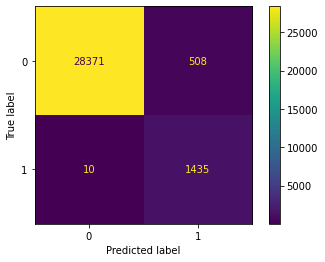

In [52]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot()

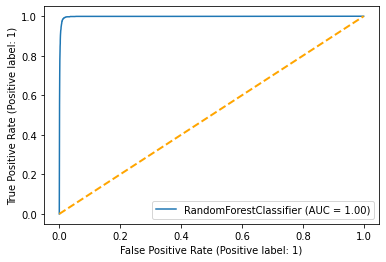

In [53]:
rfc_disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')